<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Classification problems</font></center></h2>    


### The homework is divided into four sections and the points are distributed as below:
<pre>
- Classification tasks       -> 8 points
- Improving classification   -> 2 points
__________________________________________
Total                        -> 10 points
</pre>

# 1. Classification tasks (8 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to reasons like retirement, resignation, elimination of a position, personal health, etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,80,6,3,3,2,2,2,2


## 1.1 Dataset exploration (1.0 points)

**1.1.0.
Plot the correlation of the variables against ```Attrition```. (0.3 points)<br>Make sure you perform necessary preprocessing required for the plot.** 

In [ ]:
###### Data Preprocessing ######

# list the columns
hr_data.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [ ]:
hr_data.shape

(1470, 30)

In [ ]:
# check the datatype
hr_data.Attrition.dtypes

dtype('O')

In [ ]:
# convert the predictor variable in a binary numeric variable
hr_data['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
hr_data['Attrition'].replace(to_replace='No',  value=0, inplace=True)

# convert all the categorical variables into dummy variables
import pandas as pd
df_dummies = pd.get_dummies(hr_data)
df_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,4,5993,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,3,61,2,2,5130,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,92,2,3,2090,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,4,56,3,3,2909,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,40,3,2,3468,...,0,0,0,0,0,1,0,1,1,0


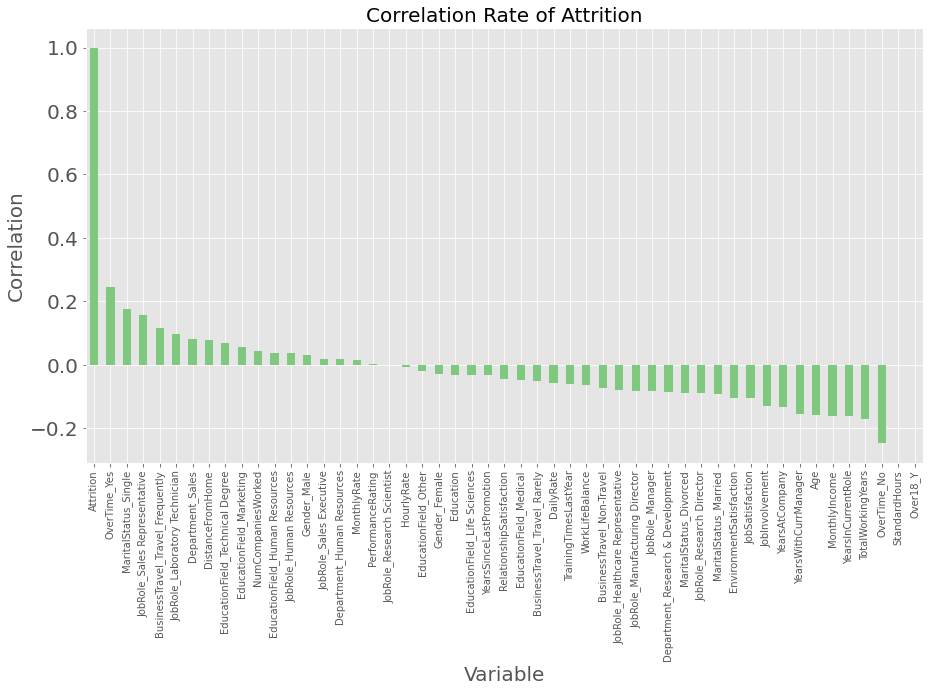

In [ ]:
import matplotlib.cm as cm

# get correlation of "Attrition" with other variables

plt.figure(figsize=(15,8))
plt.style.use('ggplot')

my_cmap = cm.get_cmap('Accent')

df_dummies.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x, y
plt.title('Correlation Rate of Attrition',fontsize=20)
plt.xlabel('Variable', fontsize=20)
plt.ylabel('Correlation',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()


**1.1.1. Write three interesting observation that you have noticed. (0.3 points)**

**<font color='red'>Answer 1:</font>** There is no correlation between `StandardHours` and `Attrition`, so we can drop `StandardHours` variable. The same applies for `Over18_Y`.

**<font color='red'>Answer 2:</font>** Correlation between `JobRole_Research_Scientist` and `Attrition` is one of the most insignificant. So we can assume, that level of employee performance does not affect the likelihood of stopping to work in the company.

**<font color='red'>Answer 3:</font>** According to correlation of `OverTime_Yes` and `OverTime_No`, it can be assumed that employees who overwork are more likely to leave the company than those who do not overwork.

**1.1.2 Plot a boxplot for ```TotalWorkingYears``` for both Attrition categories. Explain the result. (0.3 points)**

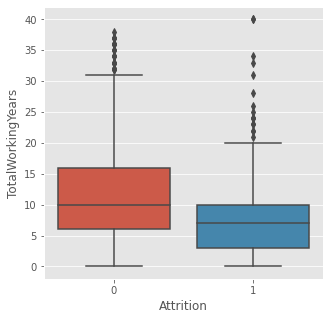

In [ ]:
import seaborn as sns
sns.boxplot(x = df_dummies.Attrition, y = df_dummies.TotalWorkingYears)

> 0 is No

> 1 is Yes

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.1 points)**

Text(0.5, 1.0, 'TotalWorkingYears Distribution')

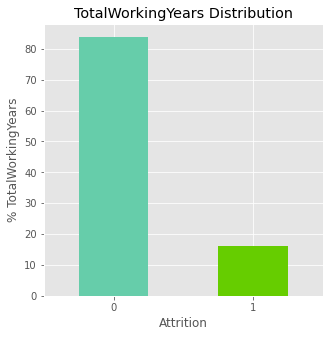

In [ ]:
colors = ['#66CDAA','#66CD00']
ax = (df_dummies['Attrition'].value_counts()*100.0 /len(df_dummies)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% TotalWorkingYears')
ax.set_xlabel('Attrition')
ax.set_ylabel('% TotalWorkingYears')
ax.set_title('TotalWorkingYears Distribution')

> 0 is No

> 1 is Yes

## 1.2 Classification  (7 points)

**1.2.1 We will predict the variable ```Attrition``` by applying different classification algorithms and compare them. But before that we have to split the data into training and test set. And before splitting the dataset, please perform the following preprocessing. (0.5 points)**
* One hot encoding (You probably performed this in ```1.1.0```, in case if you have not)
* Drop three columns with least correlation values. (Use the plot from ```1.1.0```)
* Be a vigilante, and look for columns that has suspicious values. Drop those columns (at least 2 columns), it will not be much of a help in classification.
* Finally normalize the training variables, use the following Z-Score normalizing equation for normalization; <br>

$$x_{norm}= \frac{x -\mu}{\sigma}.$$ <br>

Here, $\mu$ = mean of the training variables, $\sigma$ = standard deviation of the training variables. <br>

What is **Z-score**: It is a scaling method that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It’s useful when there are a few outliers, but not so extreme that you need clipping. Clipping is another technique when you clip off (remove) outliers by visualizing the distribution of your dataset [1]. the following figure shows how Z-score impacts the values, notice the x-axis for both the figures.
<a href="https://ibb.co/XxL5S5y"><img src="https://i.ibb.co/VY9C2CH/img.png" alt="img" border="0"></a><br />
Ref: https://developers.google.com/machine-learning/data-prep/transform/normalization

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# one hot encoding has already been done

# drop three columns with least correlation
df_dummies = df_dummies.drop(columns = ['JobRole_Research Scientist'])
df_dummies = df_dummies.drop(columns = ['HourlyRate'])
df_dummies = df_dummies.drop(columns = ['PerformanceRating'])

# drop suspicious columns 
hr_data.head()
df_dummies.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'RelationshipSatisfaction', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager',

In [ ]:
hr_data_dummies = df_dummies.drop(['StandardHours', 'Over18_Y'], axis =1)
hr_data_dummies.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufac

In [ ]:
# normalization
# Note: it seems important to mention that z-score normalization is the same thing as standardization, 
# knowing this really helped me research additional resources about its usage and implementation. Also, things can get
# a little bit confusing, because normalization on its own IS an actual form of preprocessing and one of the cells 
# in lab 06 has an unused import of sklearn.preprocessing.normalize

import pandas as pd
from sklearn import preprocessing

x = df_dummies.values
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split

X = df_dummies.drop(columns = ['Attrition'])
Y = df_dummies.Attrition
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**1.2.2 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.4 points)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

model = DT(random_state=0)

# train the model
model = model.fit(x_train,y_train)

# predict on test set
predict_test = model.predict(x_test)

# print accuracy
accuracy = model.score(x_test, y_test)
print('Accuracy of DecisionTreeClassifier on test set: ', accuracy)

Accuracy of DecisionTreeClassifier on test set:  0.7925170068027211


**1.2.3 Plot the confusion matrix for the predicted values. Why accuracy is not a good metric to use in this case ? (0.4 points)**


 Confusion Matrix
[[218  27]
 [ 34  15]]


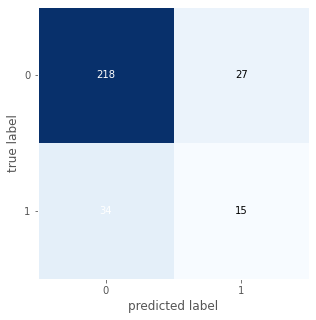

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predict_test)
print("\n Confusion Matrix")
print(confusion_matrix)

# plot confusion matrix
binary = confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()

Because the value of `Accuracy` is close to 1 due to unbalanced data, it would be better to look for alternative parameters like `Precision` and `Recall`.



In [ ]:
# precision (like an alternative to accuracy)
metrics.precision_score(y_test, predict_test)

0.35714285714285715

In [ ]:
# recall (like an alternative to accuracy)
metrics.recall_score(y_test, predict_test)

0.30612244897959184

**<font color='red'>Answer:</font>** Because the value of `Accuracy` is close to 1 due to unbalanced data, it would be better to look for alternative parameters like `Precision` and `Recall`.

**1.2.4 Formulate a dumy model (not a machine learning approach) to get 83.88% accuracy. Considering the label ratios how this model would look like? Be creative. You do not require to code for this, just a simple assumption and mathematical proof is necessary. (0.4 points)** <br>
Hint: There are two labels (yes, no) in your data.

In [ ]:
np.unique(df_dummies.Attrition, return_counts=True)

(array([0, 1]), array([1233,  237]))

**<font color='red'>Answer:</font>**  Because there are 1233 false values and 237 true values, if we create a model that always returns "false", the model would have an accuracy of 1233/(1233+237)=83.88%

**1.2.5 Use export_graphviz from sklearn.tree to visualize the trained decision tree of ```1.2.2```. (0.4 points)**

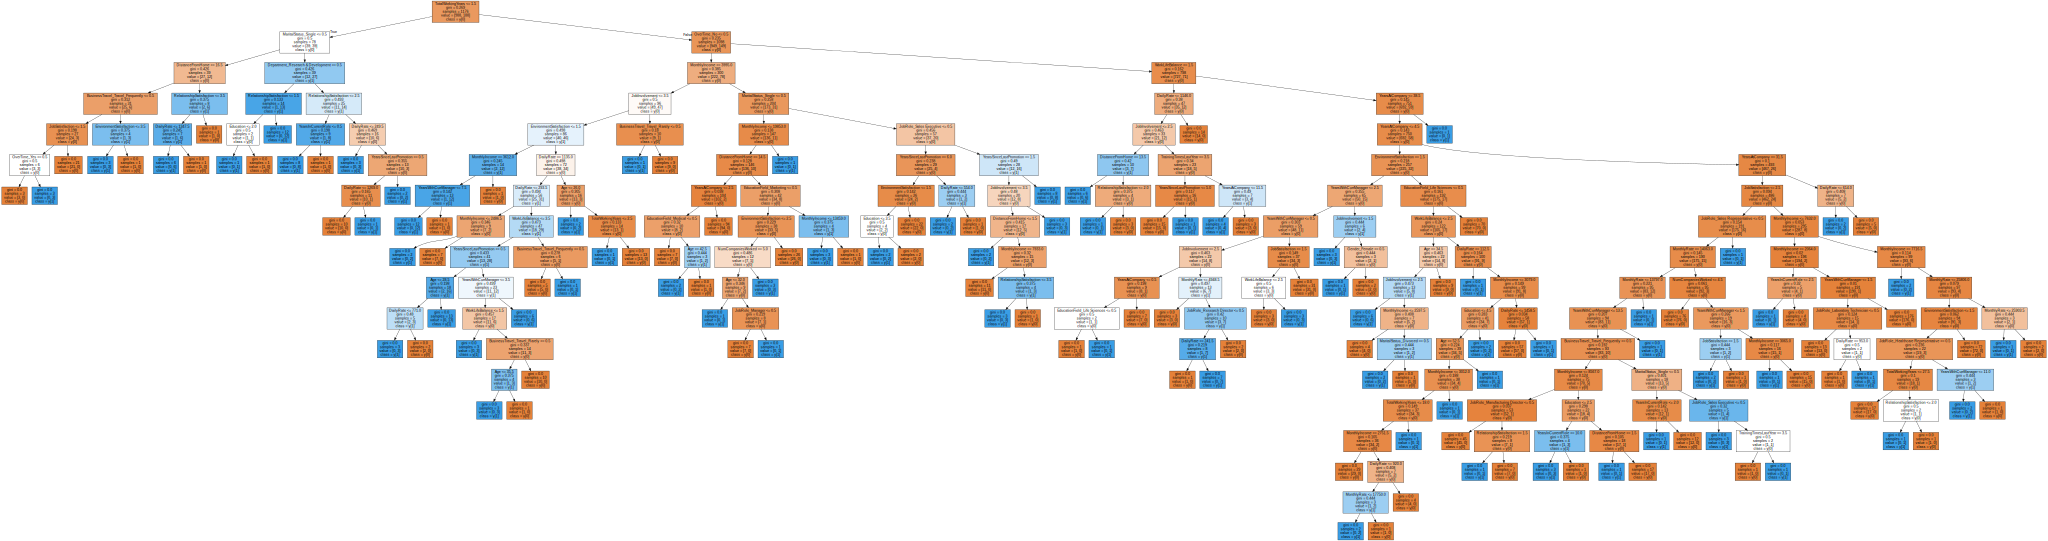

In [ ]:
import graphviz
import sklearn.tree as tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=True,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**1.2.6 Look at the visualization, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



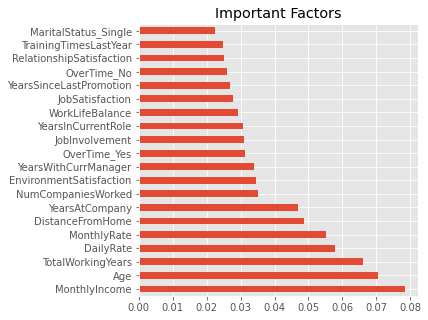

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib

# reference - https://stackoverflow.com/questions/66750706/sklearn-important-features-error-when-using-logistic-regression

clf = RandomForestClassifier()
clf = clf.fit(x_train,y_train)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
test_X_new = model.transform(x_test)

matplotlib.rc('figure', figsize=[5,5])
plt.style.use('ggplot')

feat_importances = pd.Series(clf.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Important Factors')

**<font color='red'>Answer:</font>**  According to the visualization, `TotalWorkingYears` <= 1.5. So `TotalWorkingYears` is the most important factor to decide if an employee is going to leave or not. 


**1.2.7 Plot the classification report for the same decision tree. Which evaluation metrics out of precision and recall, would you consider for this specific case-study? Please elaborate your answer. (0.4 points)**

In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       245
           1       0.36      0.31      0.33        49

    accuracy                           0.79       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.78      0.79      0.79       294



**<font color='red'>Answer:</font>** If an employee leaves because we didn't give them extra benefits, finding and hiring a replacement is very expensive. If we accidentally offer an employee benefits, even though they would have stayed, that's not as expensive. Following this logic, it is more important to avoid false negatives than it is to avoid false positives. Because of that, for this specific case-study, I would consider using **recall** as an evaluation metric.


**1.2.8 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What problem we can identify through this process? (0.4 points)**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

# calculate F1
predicted_train = cross_val_predict(clf, x_train,y_train, cv=2)
f1_train = f1_score(y_train, predicted_train)

predicted_test = cross_val_predict(clf, x_test,y_test, cv=2)
f1_test = f1_score(y_test, predicted_test)

# F1 score in training data
print(f"\nF1 score in training data:", f1_train)

# F1 score in test data
print(f"\nF1 score in test data:", f1_test)


F1 score in training data: 0.27586206896551724

F1 score in test data: 0.07547169811320753


**<font color='red'>Answer:</font>** F1 score in training data is slightly bigger than F1 score in test data.




**1.2.9 Use cross validation score to ensure that our model is generalizing well. Try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.5 points)**

In [ ]:
from sklearn.model_selection import cross_val_score
best_score = 0
best_depth = 0

for i in range(1,20):
    clf = DT(max_depth=i, random_state = 0)
    scores = cross_val_score(clf, X, Y, cv=5)
    mean_score = scores.mean()

    if mean_score >= best_score: 
      best_score = mean_score
      best_depth = i
    print('Mean score', mean_score)

print('\n The best tree depth is: ', best_depth )

Mean score 0.8346938775510205
Mean score 0.8476190476190476
Mean score 0.8517006802721088
Mean score 0.8387755102040817
Mean score 0.8306122448979592
Mean score 0.8312925170068028
Mean score 0.8183673469387754
Mean score 0.8170068027210885
Mean score 0.8088435374149661
Mean score 0.8027210884353743
Mean score 0.789795918367347
Mean score 0.7925170068027212
Mean score 0.7850340136054423
Mean score 0.7904761904761906
Mean score 0.7795918367346939
Mean score 0.7829931972789116
Mean score 0.7802721088435374
Mean score 0.7782312925170067
Mean score 0.7782312925170067

 The best tree depth is:  3


**1.2.10 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.4 points)**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svm_model = SVC(kernel = 'sigmoid', random_state=0) # With default kernel (rbf), it always predicts 0, probably because of unbalanced data -Kaarel

# train the model
X = df_dummies.drop(columns = ['Attrition'])
Y = df_dummies.Attrition
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svm_model.fit(x_train,y_train)
# predict on test set
preds = svm_model.predict(x_test)
# calculate the metrics
acc = metrics.accuracy_score(y_test, preds)
rec = metrics.recall_score(y_test, preds)
prec = metrics.precision_score(y_test, preds)
f1_score = metrics.f1_score(y_test, preds)
auc = metrics.roc_auc_score(y_test, preds)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.8129251700680272
Recall:  0.40540540540540543
Precision:  0.3125
F1_score:  0.3529411764705882
AUC:  0.6385003680723526


**1.2.11 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.4 points)**

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=9999)

# train the model
lr.fit(x_train, y_train)
# predict on test set
preds = lr.predict(x_test)
# calculate the metrics
acc = metrics.accuracy_score(y_test, preds)
rec = metrics.recall_score(y_test, preds)
prec = metrics.precision_score(y_test, preds)
f1_score = metrics.f1_score(y_test, preds)
auc = metrics.roc_auc_score(y_test, preds)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.8945578231292517
Recall:  0.4594594594594595
Precision:  0.6071428571428571
F1_score:  0.5230769230769231
AUC:  0.7083289515196131


**1.2.12 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.5 points)**


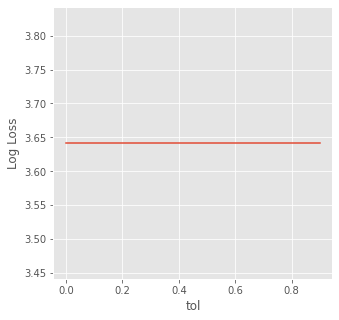

Best Tolerance, tol, Value:  0.9


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt

log_loss = []
for tol in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:
    
    # initialize the model
    model = LogisticRegression(random_state=0, max_iter=9999, tol=tol)
    # train the model
    model.fit(x_train, y_train)
    # predict on test set
    preds = model.predict(x_test)
    # calculate logloss
    loss = metrics.log_loss(y_test, preds)
    # use log_loss list to store the different logloss for different tol
    log_loss.append(loss)
    
tol = [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]
plt.plot(tol, log_loss)
plt.ylabel("Log Loss")
plt.xlabel("tol")
plt.show()


#Findidng out the best tolerance value
min_index=(log_loss.index(min(log_loss)))
print("Best Tolerance, tol, Value: ", tol[min_index])

**<font color='red'>Answer:</font>** The log_loss value is the same for all values of tol. Based on this graph, none of the tol values are better, but I pick the value 0.5 (for future tasks)

**1.2.13 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.4 points)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


#TODO: train the model
model_rf = RandomForestClassifier(random_state=0)

#TODO: predict on test set
model_rf.fit(x_train, y_train)
#TODO: classification report
prediction_test = model_rf.predict(x_test)

acc = metrics.accuracy_score(y_test, prediction_test)
rec = metrics.recall_score(y_test, prediction_test)
prec = metrics.precision_score(y_test, prediction_test)
f1_score = metrics.f1_score(y_test, prediction_test)
auc = metrics.roc_auc_score(y_test, prediction_test)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)



print(metrics.classification_report(y_test, prediction_test))

Accuracy:  0.8979591836734694
Recall:  0.2702702702702703
Precision:  0.7692307692307693
F1_score:  0.4
AUC:  0.6292985592596487
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       257
           1       0.77      0.27      0.40        37

    accuracy                           0.90       294
   macro avg       0.84      0.63      0.67       294
weighted avg       0.89      0.90      0.88       294



**1.2.14 Use the model from ```1.2.13```, calculate the predicted probability on test set. Threshold the probabilities such that it will output the class 'No'  only if the probability is 70% or higher. Otherwise, it will predict 'Yes'. (0.3 points)**


In [ ]:
probs = model.predict_proba(x_test)
pd.DataFrame(probs)

,0,1
0,0.484389,0.515611
1,0.998300,0.001700
2,0.542001,0.457999
3,0.936549,0.063451
4,0.889085,0.110915
...,...,...
289,0.946990,0.053010
290,0.955558,0.044442
291,0.977187,0.022813
292,0.986845,0.013155


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [ ]:
class_1_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, class_1_probs)
roc_auc = auc(fpr, tpr)

In [ ]:
from sklearn.metrics import log_loss

# predict probabilities
probs = model.predict_proba(x_test)

# keep the predictions for class 1 only
probs = probs[:, 1]

# calculate log loss
loss = log_loss(y_test, probs)
loss

0.30331898690281495

In [ ]:
# threshold 70%

threshold = 0.7 

pred_rf_proba = model_rf.predict_proba(x_test)
y_pred_threshold = (pred_rf_proba [:,1] >= threshold).astype('int')

print('Predicted probability on test set:{:.2f}'.format(metrics.accuracy_score(y_test, y_pred_threshold)))

Predicted probability on test set:0.88


**1.2.15 Print the classification report agian. Do you think there were some improvements regarding the classification for class Yes? Explain your answer briefly. (0.4 points)**

In [ ]:
print(metrics.classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       257
           1       1.00      0.08      0.15        37

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.90      0.88      0.84       294



**<font color='red'>Answer:</font>** `Recall` was improved after threshold was set.

**1.2.16 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.3 points)**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

# train the model
xgb_model.fit(x_train, y_train)

# predict on test set
pred_xgb = xgb_model.predict(x_test)


# calculate the metrics
acc = metrics.accuracy_score(y_test, pred_xgb)
rec = metrics.recall_score(y_test, pred_xgb)
prec = metrics.precision_score(y_test, pred_xgb)
f1_score = metrics.f1_score(y_test, pred_xgb)
auc = metrics.roc_auc_score(y_test, pred_xgb)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.891156462585034
Recall:  0.32432432432432434
Precision:  0.631578947368421
F1_score:  0.42857142857142855
AUC:  0.6485434851193606


**1.2.17 For unbalanced datasets, choose the best classifier (based on evaluation metrics that seems good for this case-study) and plot its feature importances in decreasing order. Were the 3 most important features as you expected, you can use ```1.2.5``` as reference? Please explain why. (0.5 points)**

In [ ]:
# choose a model - We're using the random forest classifier for this
# no point in retraining the model, we've already done that in previous tasks
# we can just reuse the model from variable "model_rf"

# feature importance calculation
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
7,MonthlyIncome,0.081
0,Age,0.071
12,TotalWorkingYears,0.058
1,DailyRate,0.055
2,DistanceFromHome,0.053
15,YearsAtCompany,0.048
8,MonthlyRate,0.047
18,YearsWithCurrManager,0.037
9,NumCompaniesWorked,0.036
45,OverTime_No,0.033


In [ ]:

# plot the feature importance
import plotly.express as plex

plex.bar(x=importances.feature, y=importances.importance)

**<font color='red'>Answer:</font>** The feature `TotalWorkingYears` was in the top three most important features, as expected. However, some of the other features were a bit of a surprise. Based on 1.2.5, we had thought that `MaritalStatus_Single` or `Overtime_No` would be among the most important features. While those features still have an important role in the final model, the two most important features were actually `MonthlyIncome` and `Age`.

# 2. Improving classification (2 points)

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

In [ ]:
df_dummies # This is our dataframe after the post-processing from previous task

np.unique(df_dummies.Attrition, return_counts=True)

(array([0, 1]), array([1233,  237]))

**<font color='red'>Answer:</font>** It is much better to try oversampling in this case, because if we downsample we will lose a lot of very important data that our classification models could use. This is especially true considering how severly imbalanced our data is. There are over five times more samples with `Attrition` = 0, compared to `Attrition` = 1.

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.2 points)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#TODO: apply oversampling
X = df_dummies.drop(columns = ['Attrition'])
Y = df_dummies.Attrition

ros = RandomOverSampler(random_state=0)
X_os, Y_os = ros.fit_resample(X, Y)

np.unique(Y_os, return_counts=True)

(array([0, 1]), array([1233, 1233]))

**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Train a random forest model, test it and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# split dataset in 80/20 ratio. set random_state=0, use randomforest model from 
x_train, x_test, y_train, y_test = train_test_split(X_os, Y_os, test_size=0.2, random_state=0)

# train a rf model on oversampled data
os_rf_model = RandomForestClassifier(random_state=0)
os_rf_model.fit(x_train, y_train)

# predict on test set
prediction_test = os_rf_model.predict(x_test)

# calculate metrics
acc = metrics.accuracy_score(y_test, prediction_test)
rec = metrics.recall_score(y_test, prediction_test)
prec = metrics.precision_score(y_test, prediction_test)
f1_score = metrics.f1_score(y_test, prediction_test)
auc = metrics.roc_auc_score(y_test, prediction_test)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


Accuracy:  0.9595141700404858
Recall:  0.9809885931558935
Precision:  0.945054945054945
F1_score:  0.962686567164179
AUC:  0.9580267641104142


**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.2 points)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#TODO: apply undersampling
X = df_dummies.drop(columns = ['Attrition'])
Y = df_dummies.Attrition

ros = RandomUnderSampler(random_state=0)
X_us, Y_us = ros.fit_resample(X, Y)

np.unique(Y_us, return_counts=True)

(array([0, 1]), array([237, 237]))

**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# split dataset in 80/20 ratio. set random_state=0, use randomforest model from 
x_train, x_test, y_train, y_test = train_test_split(X_us, Y_us, test_size=0.2, random_state=0)

# train model based on 1.2.12 on undersampled data
model = LogisticRegression(random_state=0, max_iter=9999, tol=0.5)
model.fit(x_train, y_train)

# predict on test set
prediction_test = model.predict(x_test)

# calculate metrics
acc = metrics.accuracy_score(y_test, prediction_test)
rec = metrics.recall_score(y_test, prediction_test)
prec = metrics.precision_score(y_test, prediction_test)
f1_score = metrics.f1_score(y_test, prediction_test)
auc = metrics.roc_auc_score(y_test, prediction_test)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


Accuracy:  0.7894736842105263
Recall:  0.8222222222222222
Precision:  0.7551020408163265
F1_score:  0.7872340425531914
AUC:  0.7911111111111111


**2.6 Which one performed better between over and under sampling (0.2 points)** 

<font color='red'> **Answer:**</font> By all metrics, oversampling performed signifcantly better than undersampling.